# We will explore this dataset using the following method

## 1. Import the libraries and the dataset and set options.
## 2. Ensure the dataset is clean and check the distribution of categorical and numeric variables.
## 3. Feature Engineering - create more columns to explore further later:
*    Total Comp
*    Tenure
*    BIPOC
*    Bonus %

## 4. Explore the data by groups
## 5. Test hypothesis

### Compensation Equity - no significance found

*   BIPOC
*   Women


### Executive team breakdown by race and gender - Executives are mostly white males.

### Explore tenure by race and gender - no significance found

### Junior Employees - Junior sales people have above average tenure and below average compensation.

* Count
* Department
* Tenure and tenure by department
* Compensation

### Group data by location - There are not as many junior employees in Boston. There is a high number of junior employees in SFO which is an expensive market to hire into.

### Explore tenure by level further - This indicates that tenure at the executive level is lower. We would need to explore more data to determine why.

### Explore bonus % by department and level to look for outliers - no significance found







# Import the libraries and the dataset and set options.

In [ ]:
#importing libraries and set options
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as pl
import datetime as dt
import numpy as np
import math
import seaborn as sns
import networkx as nx
pd.set_option('display.max_rows', 100)

In [ ]:
#importing the data as a CSV and storing it in a variable, converting variables,reindexing by ID and sorting, define date format
data = pd.read_csv("/content/mydata - mydata.csv", dtype = {"gender": "category",'managerid':'string',"race": "category","level": "category","levelnumber": "int64", "city": "category","department": "category"}, index_col = 'id',parse_dates=['startdate'], date_format='%Y-%m-%d').sort_index()

## Ensure the dataset is clean and check the distribution of categorical and numeric variables

In [ ]:
#look for nulls and count the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   first_name   1000 non-null   object        
 1   last_name    1000 non-null   object        
 2   gender       1000 non-null   category      
 3   race         1000 non-null   category      
 4   department   1000 non-null   category      
 5   level        1000 non-null   category      
 6   levelnumber  1000 non-null   int64         
 7   startdate    1000 non-null   datetime64[ns]
 8   salary       1000 non-null   int64         
 9   bonus        1000 non-null   float64       
 10  age          1000 non-null   int64         
 11  city         1000 non-null   category      
 12  managerid    999 non-null    string        
dtypes: category(5), datetime64[ns](1), float64(1), int64(3), object(2), string(1)
memory usage: 76.4+ KB


In [ ]:
#get count and proportion for all categorical variables
for i in data.select_dtypes(['category']):
    normed = pd.DataFrame(data[i].value_counts(normalize = False))
    nonnormed = pd.DataFrame(data[i].value_counts(normalize = True))
    result = pd.concat([normed,nonnormed], axis=1)
    print(result)

        count  proportion
gender                   
Male      510        0.51
Female    490        0.49
                  count  proportion
race                               
Caucasian           543       0.543
Asian               228       0.228
Hispanic             96       0.096
African American     90       0.090
Other                43       0.043
                          count  proportion
department                                 
Support                      96       0.096
Product Management           94       0.094
Sales                        94       0.094
Services                     90       0.090
Engineering                  88       0.088
Legal                        84       0.084
Business Development         81       0.081
Marketing                    81       0.081
Accounting                   75       0.075
Human Resources              73       0.073
Training                     72       0.072
Research and Development     71       0.071
Admin                       

In [ ]:
#get breakdown of numeric variables
for x in data.select_dtypes(['int64','float64']):
   print(pd.DataFrame(data[x].describe()))

       levelnumber
count  1000.000000
mean      1.927000
std       1.079276
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       8.000000
              salary
count    1000.000000
mean    84360.086000
std     44728.314257
min     25002.000000
25%     56528.750000
50%     72749.000000
75%     93815.000000
max    288502.000000
              bonus
count   1000.000000
mean   10777.308234
std    15545.654393
min     1132.425000
25%     2994.712125
50%     6410.387500
75%     9663.543000
max    99355.093200
             age
count  1000.0000
mean     28.9090
std       6.1721
min      23.0000
25%      25.0000
50%      27.0000
75%      30.0000
max      60.0000


#Feature engineering new columns in the dataset to be used in later exploration

In [ ]:
#create new column for total compensation that adds salary and bonus and check descriptive statistics
data["total comp"] = data["bonus"] + data["salary"]
data['total comp'].describe()

count      1000.000000
mean      95137.394234
std       59570.629984
min       26164.593000
25%       60782.604000
50%       78779.940000
75%      103782.949750
max      387515.886400
Name: total comp, dtype: float64

In [ ]:
#create new column for tenure in years find the descriptive statistics
today = pd.to_datetime(dt.date.today())
data['tenure (months)'] = (((today- data['startdate'])) /  np.timedelta64(1, 'D') / 30.417).astype('int64')
data['tenure (months)'].describe()

count    1000.000000
mean       52.319000
std        28.252353
min         5.000000
25%        27.000000
50%        53.000000
75%        76.250000
max       101.000000
Name: tenure (months), dtype: float64

In [ ]:
#create new column for bonus % for each employee
data["bonus %"] = (data['bonus']/data['salary'])*100
data["bonus %"].describe()

count    1000.000000
mean        9.807340
std         6.078331
min         4.500000
25%         5.050000
50%         9.400000
75%        10.800000
max        36.300000
Name: bonus %, dtype: float64

In [ ]:
#create BIPOC Column
data["bipoc"] = data["race"].str.contains('|'.join(['Asian', 'Hispanic','African American','Other']), regex=True)
data

,first_name,last_name,gender,race,department,level,levelnumber,startdate,salary,bonus,age,city,managerid,total comp,tenure (months),bonus %,bipoc
id,,,,,,,,,,,,,,,,,
1,Zollie,Mantram,Male,Caucasian,Training,Entry Level,1,2019-08-04,38302,1972.5530,25,Chicago,577,40274.5530,57,5.15,False
2,Wilona,Fellenor,Female,Caucasian,Product Management,Entry Level,1,2022-11-22,52502,2625.1000,26,San Francisco,831,55127.1000,18,5.00,False
3,Addie,Sweett,Female,Caucasian,Accounting,Junior,2,2019-12-19,82507,8498.2210,30,San Francisco,924,91005.2210,53,10.30,False
4,Braden,Hauck,Male,Asian,Engineering,Entry Level,1,2016-04-22,69453,3437.9235,27,Chicago,296,72890.9235,97,4.95,True
5,Alex,Ivain,Male,Hispanic,Product Management,Senior,4,2020-04-11,183525,33768.6000,32,San Francisco,399,217293.6000,49,18.40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Harriot,Prue,Female,Caucasian,Services,Junior,2,2018-04-22,79580,7958.0000,27,San Francisco,940,87538.0000,73,10.00,False
997,Emlyn,Cuttelar,Female,Asian,Business Development,Entry Level,1,2016-12-17,51021,2525.5395,23,Remote,23,53546.5395,89,4.95,True
998,Colby,Roller,Male,Hispanic,Services,Mid-Level,3,2018-05-14,110312,17374.1400,42,Boston,770,127686.1400,72,15.75,True


#Explore the data by groups

In [ ]:
#explore numeric data by groups
for i in data.select_dtypes(['category']):
  normed = pd.DataFrame(data[i].value_counts(normalize = False))
  nonnormed = pd.DataFrame(data[i].value_counts(normalize = True))
  tenure = pd.DataFrame(data.groupby(i)['tenure (months)'].mean())
  totalcomp = pd.DataFrame(data.groupby(i)['total comp'].mean())
  bonus = pd.DataFrame(data.groupby(i)['bonus %'].mean())
  result = pd.concat([normed, nonnormed,tenure,totalcomp,bonus], axis=1)
  print(result)

        count  proportion  tenure (months)    total comp    bonus %
gender                                                             
Male      510        0.51        52.531373  97504.681544  10.046118
Female    490        0.49        52.097959  92673.482952   9.558816
                  count  proportion  tenure (months)    total comp    bonus %
race                                                                         
Caucasian           543       0.543        52.513812  97807.095719  10.063738
Asian               228       0.228        51.679825  91386.774439   9.335000
Hispanic             96       0.096        54.135417  90118.366061   9.613854
African American     90       0.090        53.066667  91691.818274   9.496000
Other                43       0.043        47.627907  99728.602319  10.157674
                          count  proportion  tenure (months)     total comp  \
department                                                                    
Support                 

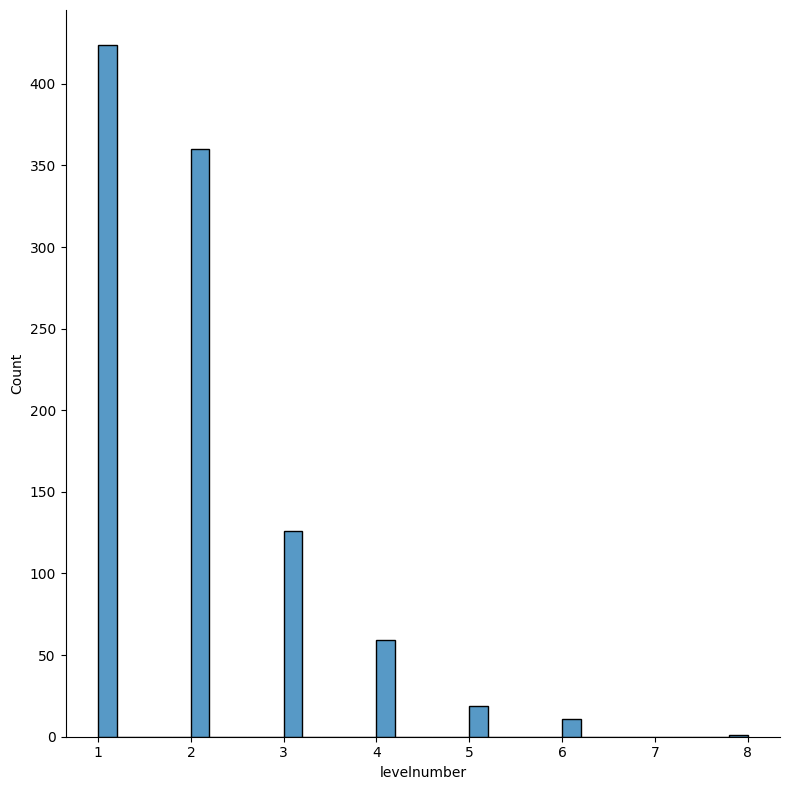

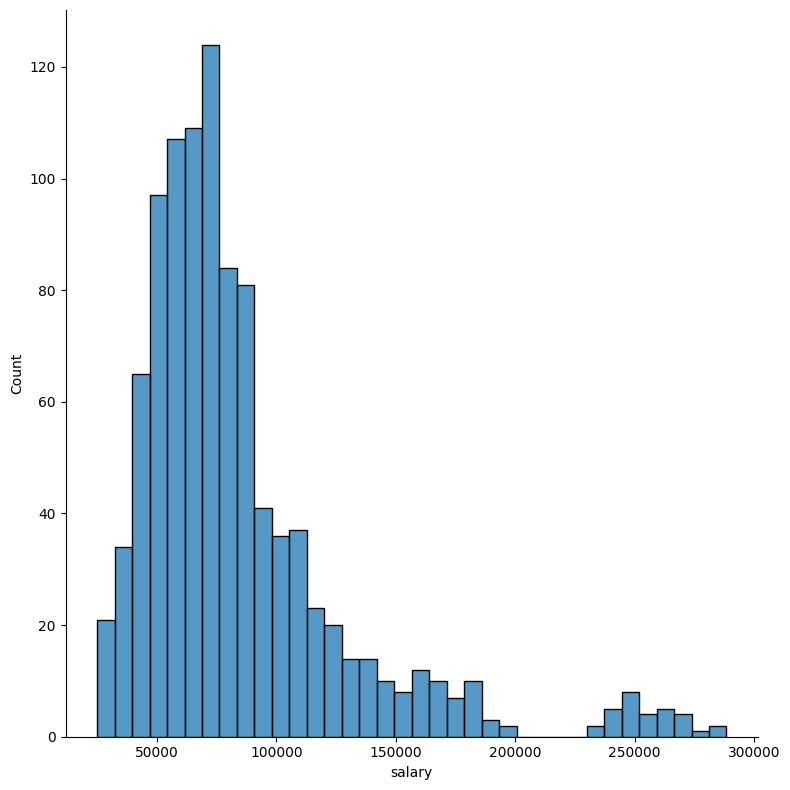

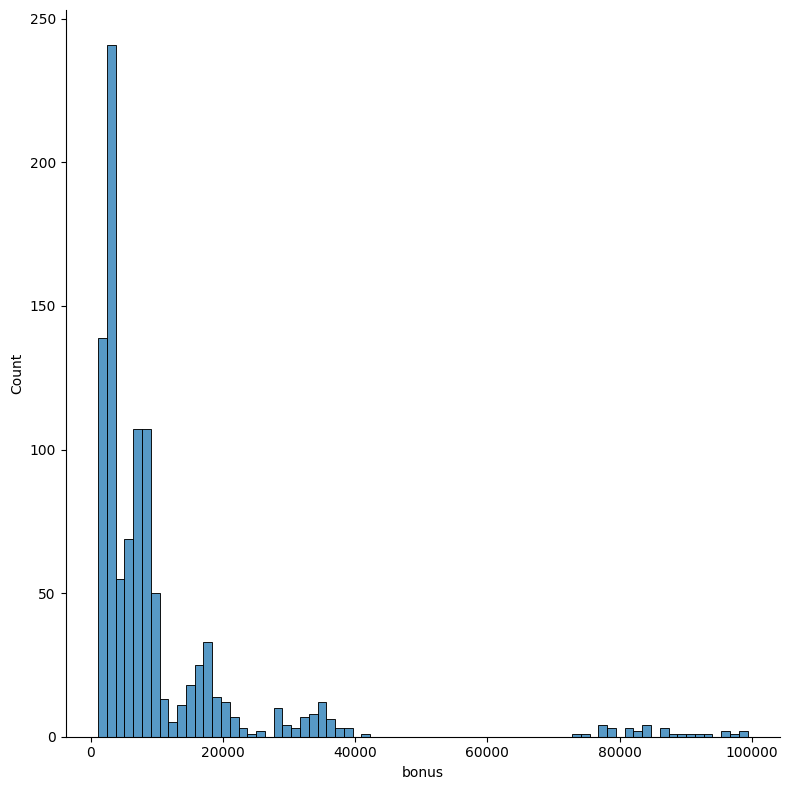

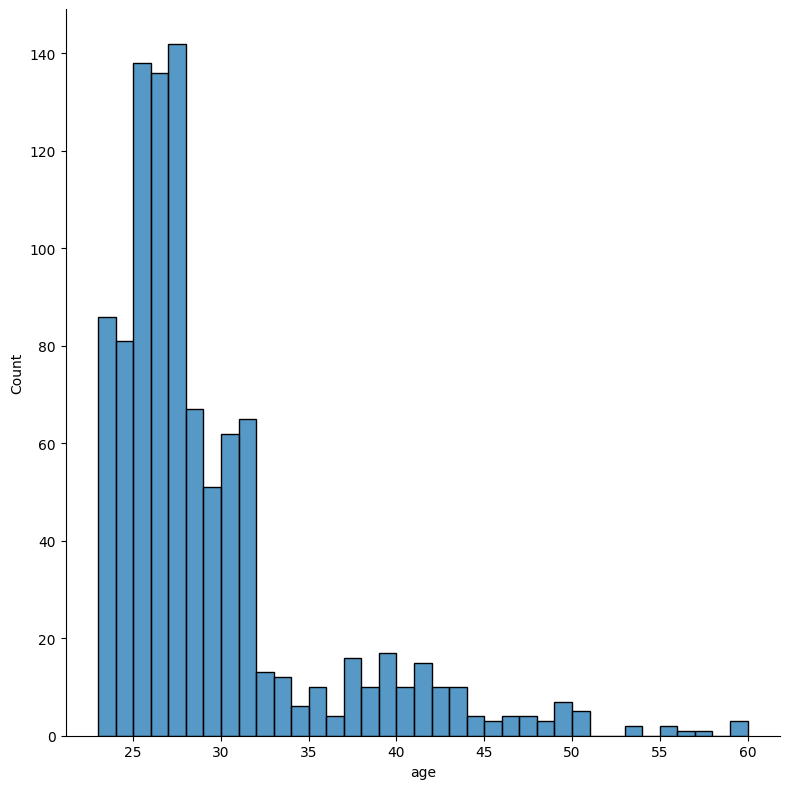

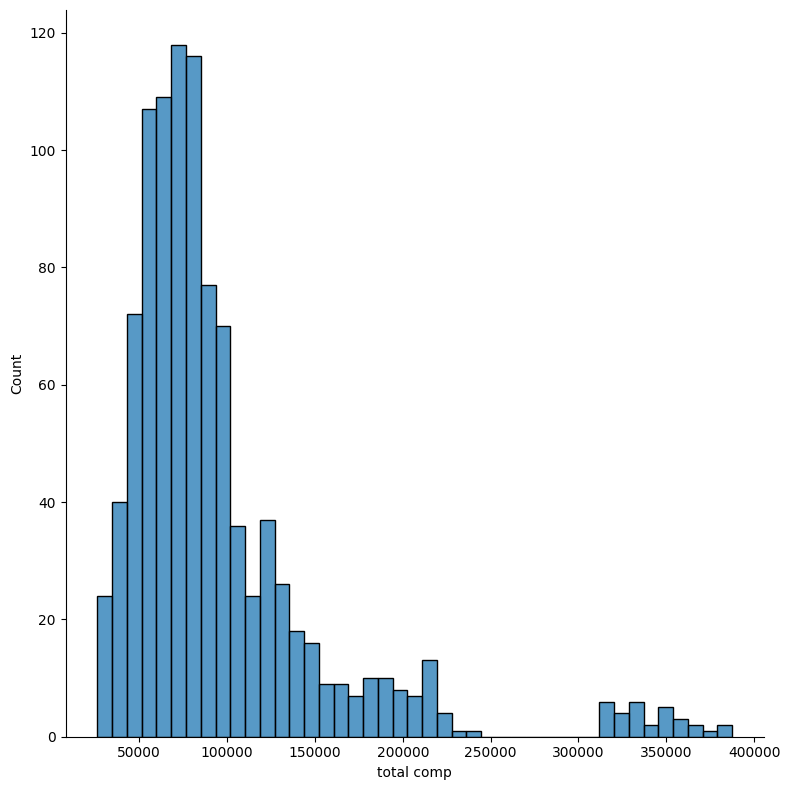

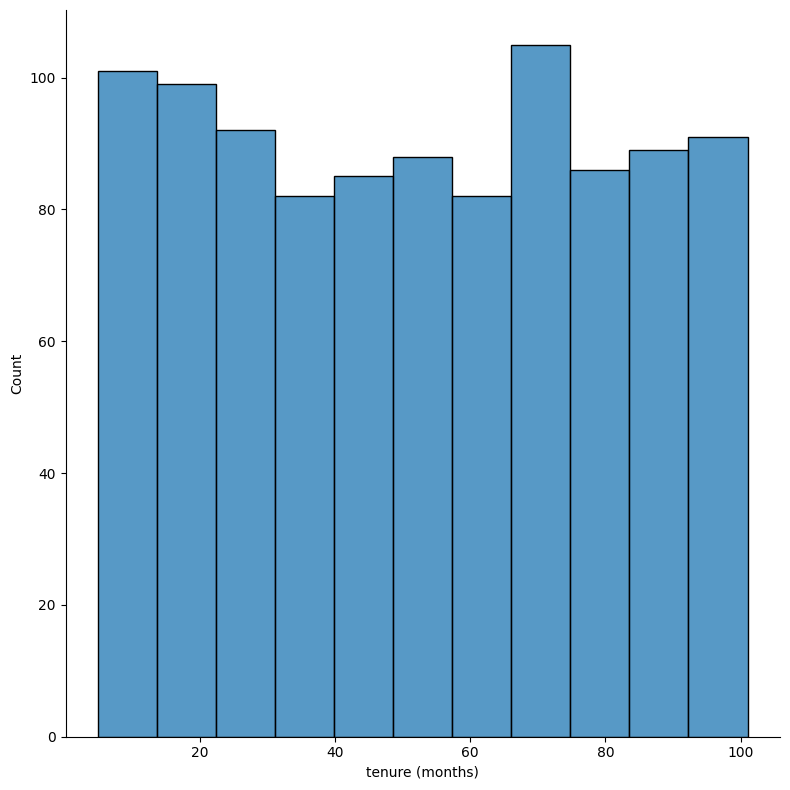

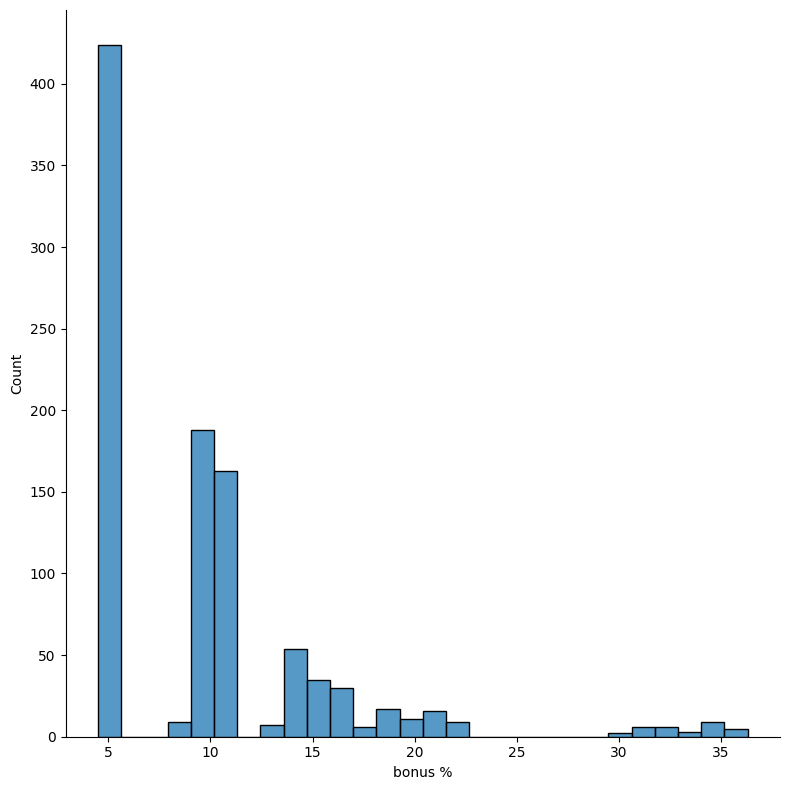

In [ ]:
#create histograms for each of the numeric variables
for x in data.select_dtypes(['int64','float64']):
   sns.displot(data[x], kde=False, height = 8)

Explore the Admin department as it is an outlier

In [ ]:
#print only the admin department it is only the CEO
data[data['department'] == 'Admin']

,first_name,last_name,gender,race,department,level,levelnumber,startdate,salary,bonus,age,city,managerid,total comp,tenure (months),bonus %,bipoc
id,,,,,,,,,,,,,,,,,
808,Allin,Ritmeier,Male,Caucasian,Admin,CEO,8,2020-03-04,269660,87208.044,41,New York,<NA>,356868.044,50,32.34,False


# Explore hypothesis

I want to explore if BIPOC people and women are making less than white people and men

<Axes: title={'center': 'total comp'}, xlabel='race'>

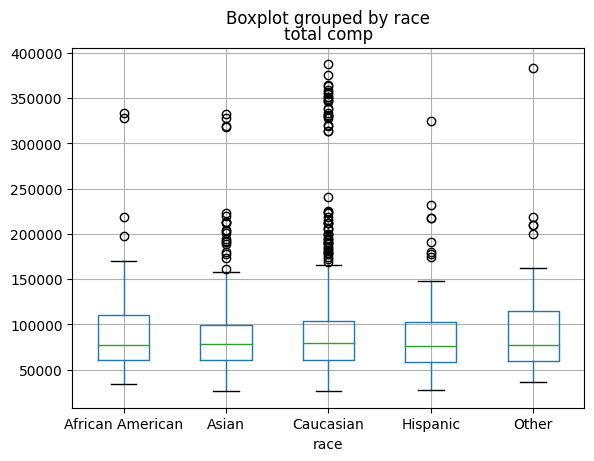

In [ ]:
#create boxplot of total comp by race to look for any obvious outliers, none found
data.boxplot(by = 'race', column = ['total comp'])

first I'll loop it and then double click and visualize for race and gender

TtestResult(statistic=-1.545874354760165, pvalue=0.12245193827166366, df=998.0)

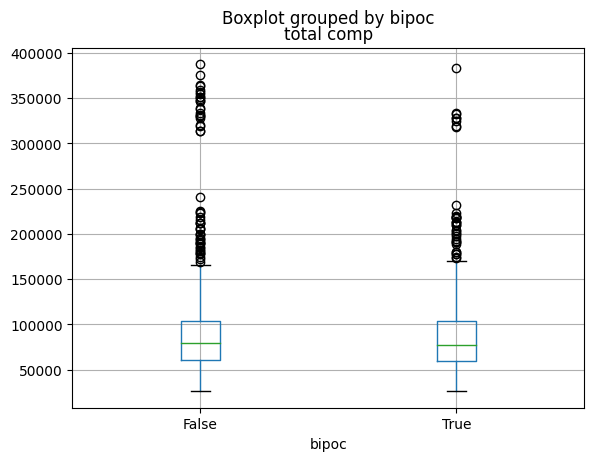

In [ ]:
#perform independent t-test of compensation between bipoc and caucasian employees and create boxplot
bipoc = data[data['bipoc'] == True]
caucasian = data[data['race'] == 'Caucasian']
data.boxplot(by = 'bipoc', column = ['total comp'])
ttest_ind(bipoc['total comp'], caucasian['total comp'])

When we look at all bipoc people, we don't see statistical significance. However, we included Asian people who could skew the dataset...I wonder if we remove them if we see something different.

In [ ]:
#perform independent t-test of compensation between african american and caucasian employees
african_american = data[data['race'] == 'African American']
ttest_ind(african_american['total comp'], caucasian['total comp'])

TtestResult(statistic=-0.8464359312906196, pvalue=0.3976304858982638, df=631.0)

This is surprising. We know that t-tests are means, std dev, and counts. Let's see why it's closer.

In [ ]:
data.groupby('race').agg({'total comp': ['mean', 'count',np.std]})

total comp                    
                          mean count           std
race                                              
African American  91691.818274    90  51803.049982
Asian             91386.774439   228  51036.947977
Caucasian         97807.095719   543  65198.577351
Hispanic          90118.366061    96  48192.169754
Other             99728.602319    43  65269.069034

While the means are close, the standard deviation is much higher which indicates a greater range. We will explore this further later. For now, let's look at Hispanic vs Caucasian employees.

In [ ]:
#perform independent t-test of compensation between hispanic and caucasian employees
hispanic = data[data['race'] == 'Hispanic']
ttest_ind(hispanic['total comp'], caucasian['total comp'])

TtestResult(statistic=-1.1030956875388647, pvalue=0.2704021710633812, df=637.0)

Nothing significant here either.

## Explore differneces in total compensation by gender

TtestResult(statistic=1.282466173840882, pvalue=0.19997695595504292, df=998.0)

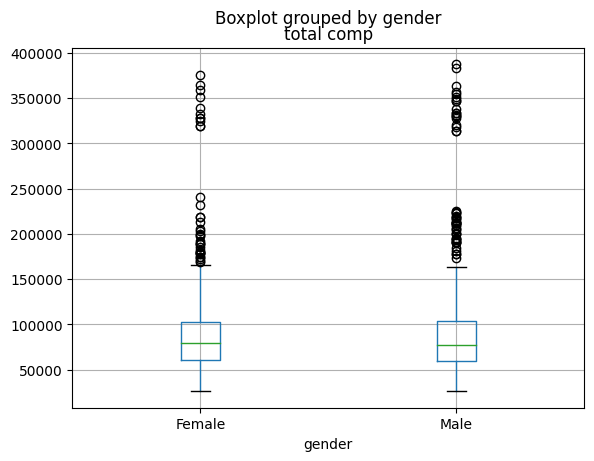

In [ ]:
#perform independent t-test to determine statistical significance between male and female total compensation and create boxplot to visualize the data
male = data[data['gender'] == 'Male']
female = data[data['gender'] == 'Female']
data.boxplot(by = 'gender', column = ['total comp'])
ttest_ind(male['total comp'], female['total comp'])

Nothing significant here let's explore further.

In [ ]:
data.groupby('gender').agg({'total comp': ['mean', 'count',np.std]})

total comp                    
                mean count           std
gender                                  
Female  92673.482952   490  53437.628309
Male    97504.681544   510  64884.661648

As we saw with gender, the standard deviation is higher indicating greater spread. Let's explore this further. Maybe people at the executive level are less diverse.

#Explore executive group by race and gender

In [ ]:
#define executive group as anyone at the executive level or above and determine the racial breakdown of this group
execs = data[data['levelnumber'] >= 6]
pd.DataFrame(execs["race"].value_counts(normalize=True))

,proportion
race,
Caucasian,0.916667
African American,0.083333
Asian,0.000000
Hispanic,0.000000
Other,0.000000


This is significant. Almost 92% of executives are white. We would need to investigate this further to deterimine the cause.

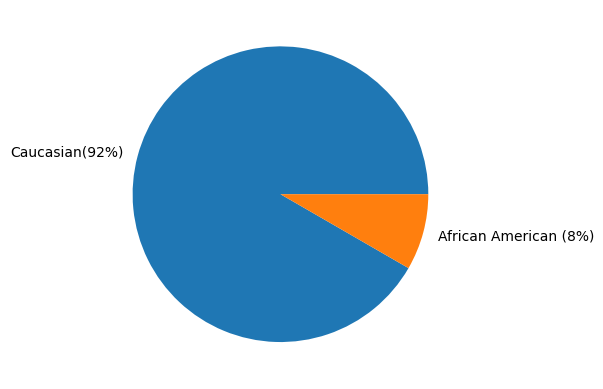

In [ ]:
#visualize the above data
pl.pie(execs["race"].value_counts(),labels = ['Caucasian(92%)', 'African American (8%)', ' ', ' ',' '])
pl.show()

In [ ]:
#find gender breakdown of executives defined above
pd.DataFrame(execs["gender"].value_counts(normalize=True))

,proportion
gender,
Male,0.916667
Female,0.083333


This is significant. Almost 92% of executives are male. We would need to investigate this further to deterimine the cause.

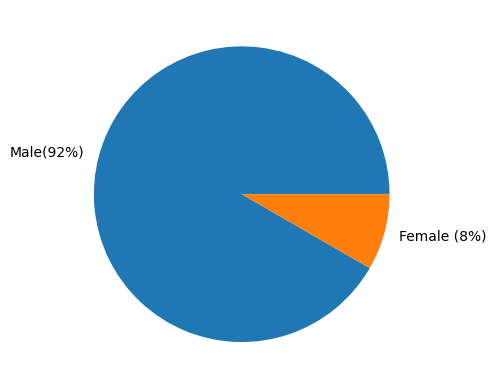

In [ ]:
#visualize the above data
pl.pie(execs["gender"].value_counts(),labels = ['Male(92%)', 'Female (8%)'])
pl.show()

#Explore tenure by race and gender

Let's explore gender first.

TtestResult(statistic=0.2423963737638562, pvalue=0.8085228469796168, df=998.0)

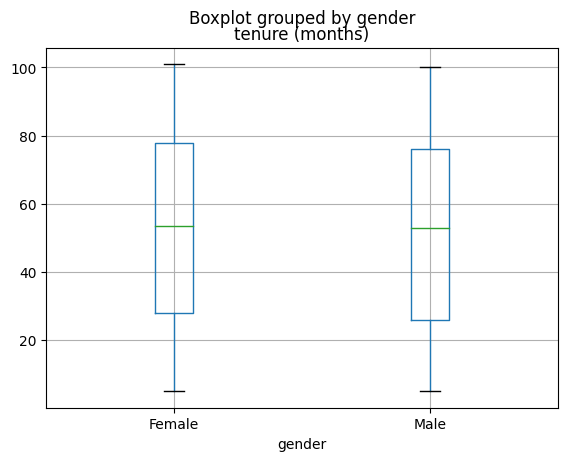

In [ ]:
#perform independent t-test to determine statistical significance between male and female tenure and create boxplot to visualize the data
data.boxplot(by = 'gender', column = ['tenure (months)'])
ttest_ind(male['tenure (months)'], female['tenure (months)'])

In [ ]:
data.groupby('gender').agg({'tenure (months)': ['mean', 'count',np.std]})

tenure (months)                 
                  mean count        std
gender                                 
Female       52.097959   490  28.318207
Male         52.531373   510  28.215108

Nothing signficant here. Let's explore race next.

tenure (months)                 
                            mean count        std
race                                             
African American       53.066667    90  26.870392
Asian                  51.679825   228  28.504241
Caucasian              52.513812   543  28.224575
Hispanic               54.135417    96  28.822002
Other                  47.627907    43  29.514341

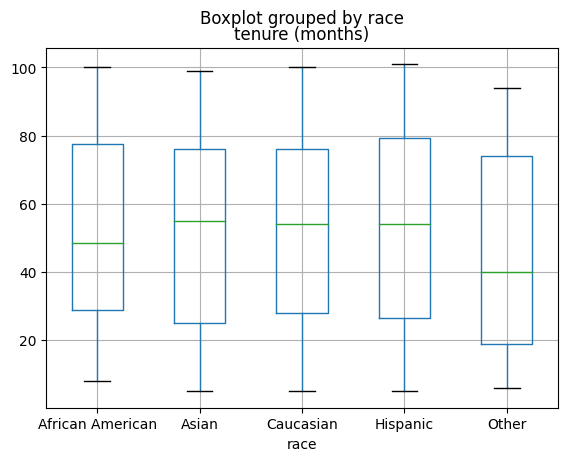

In [ ]:
#explore tenure data by race
data.boxplot(by = 'race', column = ['tenure (months)'])
data.groupby('race').agg({'tenure (months)': ['mean', 'count',np.std]})

TtestResult(statistic=0.2375735305408516, pvalue=0.8122606441864048, df=998.0)

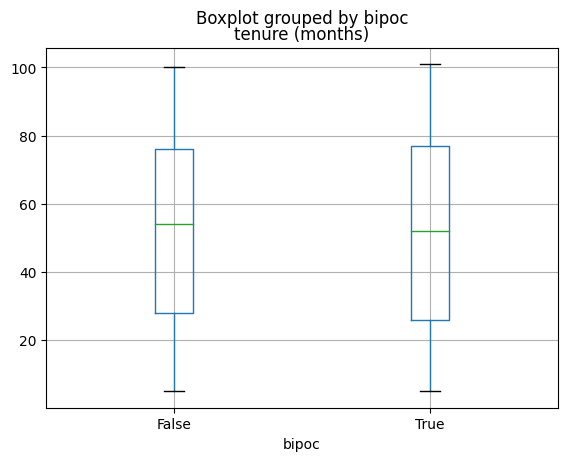

In [ ]:
#perform independent t-test to determine statistical significance between bipoc and caucasian tenure and create boxplot to visualize the data
data.boxplot(by = 'bipoc', column = ['tenure (months)'])
ttest_ind(caucasian['tenure (months)'], bipoc['tenure (months)'])

In [ ]:
#boxplot of tenure by race and perform independent t-test for african american and caucasian employees as they seem to be outlying
ttest_ind(caucasian['tenure (months)'], african_american['tenure (months)'])

TtestResult(statistic=-0.17325681843136065, pvalue=0.8625051264200663, df=631.0)

Nothing significant here either

#Let's explore Junior Employees by department to look for outliers


In [ ]:
#define Junior employees and figure out what departments they are in
junior_employees = data[data['levelnumber'] <=2]
junior_employees.value_counts('department')

department
Sales                       78
Support                     77
Product Management          72
Services                    71
Marketing                   70
Engineering                 69
Legal                       62
Research and Development    61
Human Resources             59
Business Development        58
Accounting                  56
Training                    51
Admin                        0
Name: count, dtype: int64

In [ ]:
#determine mean junior employee tenure
junior_employees['tenure (months)'].mean()

52.0

<Axes: title={'center': 'tenure (months)'}, xlabel='department'>

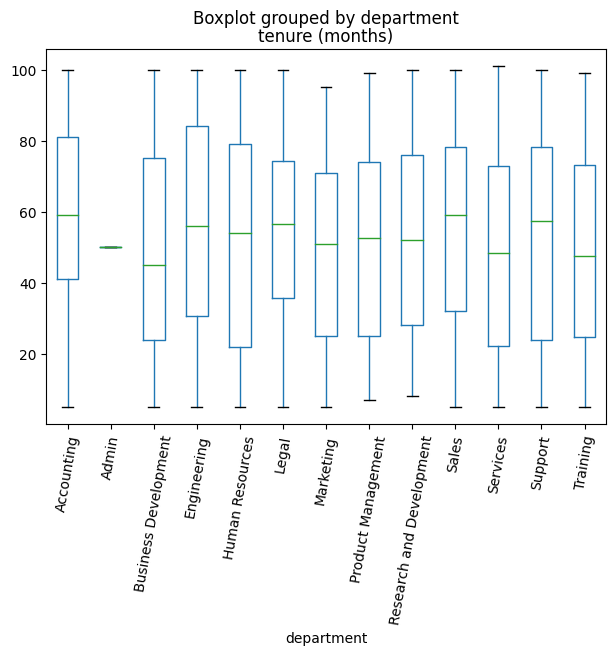

In [ ]:
#look at tenure by department to see where recent hiring has been
data.boxplot(by = 'department', column = ['tenure (months)'], figsize = (7, 5), rot = 80, grid = False)

In [ ]:
#determine avg tenure by department for junior employees
junior_employees.groupby('department')['tenure (months)'].mean()

department
Accounting                  57.982143
Admin                             NaN
Business Development        46.879310
Engineering                 55.739130
Human Resources             50.101695
Legal                       53.451613
Marketing                   49.157143
Product Management          51.069444
Research and Development    52.163934
Sales                       55.089744
Services                    50.704225
Support                     49.701299
Training                    52.196078
Name: tenure (months), dtype: float64

The Sales, Accounting and Engineering team have higher junior tenure next let's explore compensation which is often determined by job type and location

In [ ]:
#determine total comp avg for junior employees as a whole
junior_employees['total comp'].mean()

71261.44661734694

In [ ]:
#determine avg total comp by department for junior employees
junior_employees.groupby(['department','city']).agg({"total comp" : ["count", "mean"]})

total comp              
                                            count          mean
department               city                                  
Accounting               Boston                 7  78504.592000
                         Chicago                5  67324.100000
                         New York              22  70429.678682
                         Remote                 4  70662.110125
                         San Francisco         18  81669.469611
Admin                    Boston                 0           NaN
                         Chicago                0           NaN
                         New York               0           NaN
                         Remote                 0           NaN
                         San Francisco          0           NaN
Business Development     Boston                 7  76190.156286
                         Chicago               12  76257.365292
                         New York              10  74334.263300
                         Remote                 6  72068.750417
                         San Francisco         23  73389.065087
Engineering              Boston                 4  97521.058000
                         Chicago               12  95737.215625
                         New York              23  97652.153565
                         Remote                 5  98806.184200
                         San Francisco         25  96256.202280
Human Resources          Boston                 4  76770.336000
                         Chicago                5  55960.068900
                         New York              14  67199.105750
                         Remote                 5  60029.499400
                         San Francisco         31  60553.228339
Legal                    Boston                 3  62566.747000
                         Chicago               10  73129.430050
                         New York              18  78834.043000
                         Remote                 5  68450.384900
                         San Francisco         26  72286.715962
Marketing                Boston                 6  67215.986667
                         Chicago               16  68532.342594
                         New York              12  72848.872458
                         Remote                 6  72465.502250
                         San Francisco         30  71299.124067
Product Management       Boston                 3  62445.333667
                         Chicago               20  84983.964675
                         New York              17  88662.469471
                         Remote                 6  81515.822583
                         San Francisco         26  74914.828019
Research and Development Boston                 4  94268.199875
                         Chicago               16  85578.177781
                         New York              14  94030.184571
                         Remote                 8  89654.378375
                         San Francisco         19  91147.324211
Sales                    Boston                 6  56983.832750
                         Chicago               12  51642.339292
                         New York              17  51780.622588
                         Remote                 7  55442.740571
                         San Francisco         36  54468.033278
Services                 Boston                 7  49011.552714
                         Chicago               15  56778.189500
                         New York              13  59434.475885
                         Remote                 6  65383.221583
                         San Francisco         30  59717.494033
Support                  Boston                 5  78556.007400
                         Chicago               15  69552.339700
                         New York              23  61522.387000
                         Remote                 9  69508.787333
                         San Francisco         25  65067.087580
Trainin

Junior sales people have above average tenure and below average compensation. We need more data to explore further but it is interesting.

#Explore location data further

In [ ]:
#breakdown of numeric variables by city
citylvl = data.groupby("city").agg({"levelnumber" : ["count", "mean",np.std]})
citytenure = data.groupby("city").agg({"tenure (months)" : ["mean", np.std]})
citycomp = data.groupby("city").agg({"total comp" : ["mean", np.std]})
cityage = data.groupby("city").agg({"age" : ["mean", np.std]})
citytable = pd.concat([citylvl,citytenure,citycomp,cityage], axis=1)
citytable

levelnumber                     tenure (months)             \
                    count      mean       std            mean        std   
city                                                                       
Boston                 88  2.068182  1.080607       57.056818  27.477622   
Chicago               191  2.036649  1.241272       49.502618  28.447158   
New York              246  1.947154  1.136254       50.686992  28.097273   
Remote                 84  1.738095  0.893336       55.190476  28.179064   
San Francisco         391  1.869565  0.984948       53.038363  28.356269   

                  total comp                      age            
                        mean           std       mean       std  
city                                                             
Boston          99964.037065  59445.327540  30.272727  6.955899  
Chicago        105016.765697  74807.671911  29.523560  7.423166  
New York        96212.924886  60034.904345  28.601626  5.610107  
Remote          85182.899560  43679.382025  28.023810  5.711911  
San Francisco   90686.991404  53011.219688  28.685422  5.687212

It looks like Boston has higher mean level number with low varience let's explore this further.

In [ ]:
#determine where most executives are located
citylevelnonrm = data.groupby('city')['level'].value_counts(normalize=True)
citylevelnonnrm = data.groupby('city')['level'].value_counts(normalize=False)
execloc = pd.concat([citylevelnonnrm,citylevelnonrm], axis=1)
execloc

count  proportion
city          level                         
Boston        Entry Level     33    0.375000
              Junior          29    0.329545
              Mid-Level       15    0.170455
              Senior           9    0.102273
              VP               2    0.022727
              Executive        0    0.000000
              CEO              0    0.000000
Chicago       Entry Level     81    0.424084
              Junior          64    0.335079
              Mid-Level       20    0.104712
              Senior          14    0.073298
              VP               8    0.041885
              Executive        4    0.020942
              CEO              0    0.000000
New York      Entry Level    102    0.414634
              Junior          93    0.378049
              Mid-Level       28    0.113821
              Senior          15    0.060976
              Executive        4    0.016260
              VP               3    0.012195
              CEO              1    0.004065
Remote        Entry Level     39    0.464286
              Junior          33    0.392857
              Mid-Level        9    0.107143
              Senior           2    0.023810
              Executive        1    0.011905
              CEO              0    0.000000
              VP               0    0.000000
San Francisco Entry Level    169    0.432225
              Junior         141    0.360614
              Mid-Level       54    0.138107
              Senior          19    0.048593
              VP               6    0.015345
              Executive        2    0.005115
              CEO              0    0.000000

There are not as many junior employees in Boston. There is a high number of junior employees in SFO which is an expensive market to hire into.

# Explore tenure by level further

<Axes: title={'center': 'tenure (months)'}, xlabel='levelnumber'>

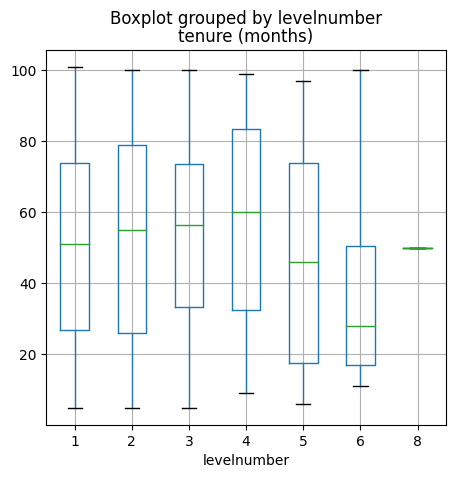

In [ ]:
#boxplot of tenure by level
data.boxplot(by = 'levelnumber', column = 'tenure (months)', figsize = (5, 5))

This indicates that tenure at the executive level is lower. We would need to explore more data to determine why.

#Explore bonus % by department and level to look for outliers

In [ ]:
#explore bonus % by department
data.groupby(["department", 'level']).agg({"bonus %" : ["count", "mean"]})

bonus %           
                                       count       mean
department               level                         
Accounting               CEO               0        NaN
                         Entry Level      33   4.971212
                         Executive         1  32.010000
                         Junior           23  10.039130
                         Mid-Level        12  14.712500
                         Senior            4  19.600000
                         VP                2  31.515000
Admin                    CEO               1  32.340000
                         Entry Level       0        NaN
                         Executive         0        NaN
                         Junior            0        NaN
                         Mid-Level         0        NaN
                         Senior            0        NaN
                         VP                0        NaN
Business Development     CEO               0        NaN
                         Entry Level      33   4.974242
                         Executive         1  35.970000
                         Junior           25  10.076000
                         Mid-Level        15  14.930000
                         Senior            4  20.200000
                         VP                3  32.120000
Engineering              CEO               0        NaN
                         Entry Level      36   4.909722
                         Executive         1  34.320000
                         Junior           33   9.969697
                         Mid-Level        14  15.085714
                         Senior            3  19.533333
                         VP                1  34.980000
Human Resources          CEO               0        NaN
                         Entry Level      29   4.875862
                         Executive         1  34.650000
                         Junior           30  10.003333
                         Mid-Level         4  14.512500
                         Senior            5  21.160000
                         VP                4  32.835000
Legal                    CEO               0        NaN
                         Entry Level      35   4.992857
                         Executive         0        NaN
                         Junior           27  10.044444
                         Mid-Level        14  14.753571
                         Senior            8  19.675000
                         VP                0        NaN
Marketing                CEO               0        NaN
                         Entry Level      40   5.017500
                         Executive         1  32.670000
                         Junior           30  10.016667
                         Mid-Level         7  14.742857
                         Senior            3  19.533333
                         VP                0        NaN
Product Management       CEO               0        NaN
                         Entry Level      34   4.916176
                         Executive         1  35.970000
                         Junior           38  10.005263
                         Mid-Level         9  15.016667
                         Senior           10  20.020000
                         VP                2  35.310000
Research and Development CEO               0        NaN
                         Entry Level      35   5.070000
                         Executive         1  32.010000
                         Junior           26   9.961538
                         Mid-Level         5  14.790000
                         Senior            3  19.800000
                         VP                1  34.980000
Sales                    CEO               0        NaN
                         Entry Level      48   4.944792
                         Executive         1  36.300000
                         Junior           30   9.923333
                         Mid-Level         9  14.366667
                         Senior            4  19.200000
     

Bonus % does not vary by level and department nothing significant here.